In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
def interpolateSignal(df2):
    df = df2.dropna()
    t0 = df.index.to_julian_date()
    dt = 1/24/60 #sample at 1 minute interval
    t = np.arange(t0.min(),t0.max()+dt,dt)

    npower2 = int(np.ceil(np.log2(t.shape[0])))
    t = np.linspace(t0.min(),t0.max(),2**npower2)
    dt = np.diff(t)[0]

    print('interpolating with dt = {} days  = {} seconds'.format(dt,dt*24*60*60))
    print('and shape 2**{} = {}  '.format(npower2, t.shape))

    h = np.interp(t,t0,df['height'])
    return dt, t, h

In [3]:
def filterSignal(h,cut,dt):
    
    print('taking fft of signal with shape:', h.shape)
    a = np.fft.fft(h)
    freq = np.fft.fftfreq(h.shape[0],d=dt)
    alow = np.where(np.abs(freq)<=cut,a,0.0)
    ahigh = np.where(np.abs(freq)>cut,a,0.0)
    print('getting low freq signal')
    hlow = np.fft.ifft(alow)
    print('getting high freq signal')
    hhigh = np.fft.ifft(ahigh)
    print('done')
    nonzerolow = np.where(np.abs(alow)>1e-5)[0]
    nonzerohigh = np.where(np.abs(ahigh)>1e-5)[0]
    lowSignal = {
        'a': alow[nonzerolow],
        'h': hlow,
        'freq': freq[nonzerolow]
    }
    
    highSignal = {
        'a': ahigh[nonzerohigh],
        'h': hhigh,
        'freq': freq[nonzerohigh]
    }
    return lowSignal, highSignal

In [4]:
def getFilteredSignal(df,cut):
    dt, t,h = interpolateSignal(df)
    lowSignal, highSignal = filterSignal(h,cut,dt)
    return lowSignal, highSignal, t, h

In [5]:
stations = ['aric', 'pisa', 'iqui', 'pata', 'toco2', 'meji', 'anto', 
          'papo', 'talt2', 'chnr', 'cald', 'huas2', 'coqu',
          'pich2', 'qtro', 'valp', 'sano', 'buca', 'const']

In [6]:
filteredSignals = {}
for station in stations:
    data = pd.read_csv('{}.csv'.format(station))
    data['date'] = pd.to_datetime(data['Time (UTC)'])
    data = data.set_index('date')
    data['height'] = data['prs(m)']

    lowSignal,highSignal, t, h = getFilteredSignal(data, 2.5)
    filteredSignals[station] = lowSignal, highSignal, t, h

interpolating with dt = 0.0004577706567943096 days  = 39.55138474702835 seconds
and shape 2**16 = (65536,)  
taking fft of signal with shape: (65536,)
getting low freq signal
getting high freq signal
done
interpolating with dt = 0.0004577706567943096 days  = 39.55138474702835 seconds
and shape 2**16 = (65536,)  
taking fft of signal with shape: (65536,)
getting low freq signal
getting high freq signal
done
interpolating with dt = 0.0004577706567943096 days  = 39.55138474702835 seconds
and shape 2**16 = (65536,)  
taking fft of signal with shape: (65536,)
getting low freq signal
getting high freq signal
done
interpolating with dt = 0.0004577706567943096 days  = 39.55138474702835 seconds
and shape 2**16 = (65536,)  
taking fft of signal with shape: (65536,)
getting low freq signal
getting high freq signal
done
interpolating with dt = 0.00045775994658470154 days  = 39.55045938491821 seconds
and shape 2**16 = (65536,)  
taking fft of signal with shape: (65536,)
getting low freq signal
gett

aric


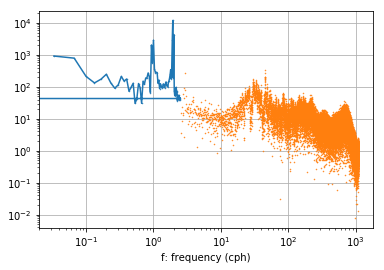




pisa


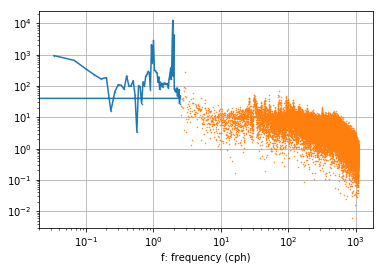




iqui


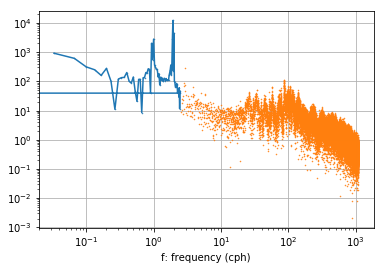




pata


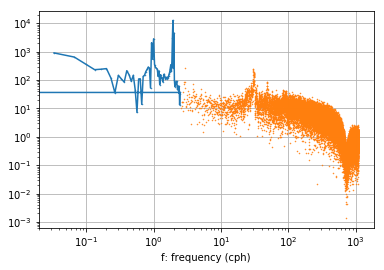




toco2


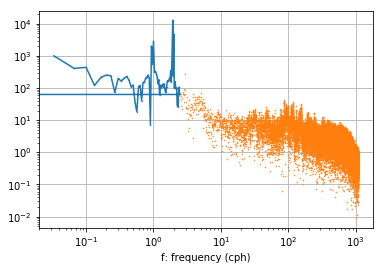




meji


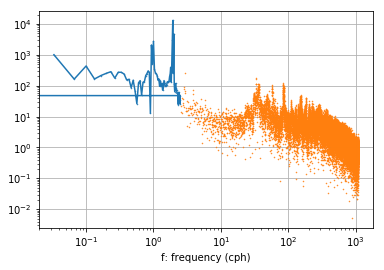




anto


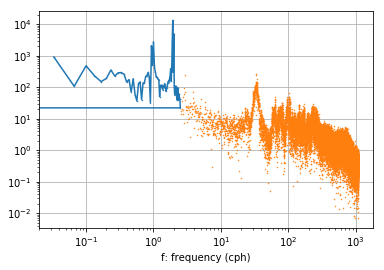




papo


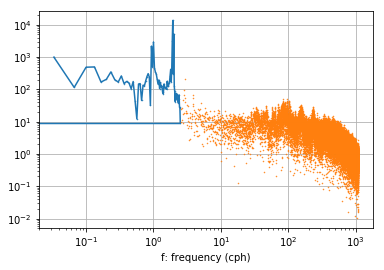




talt2


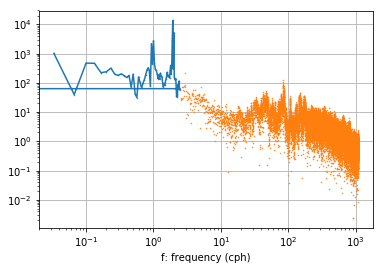




chnr


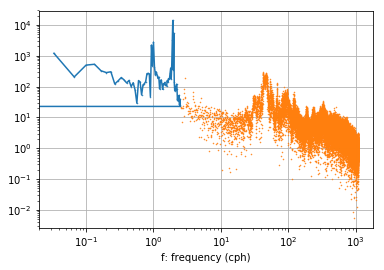




cald


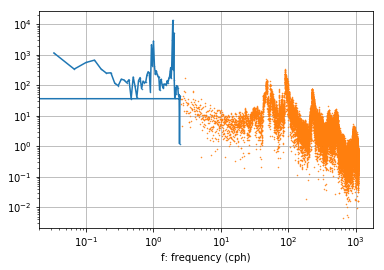




huas2


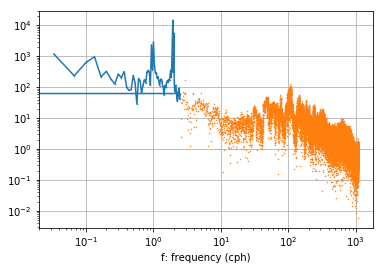




coqu


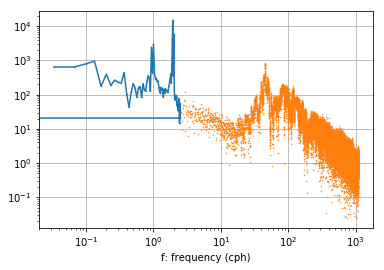




pich2


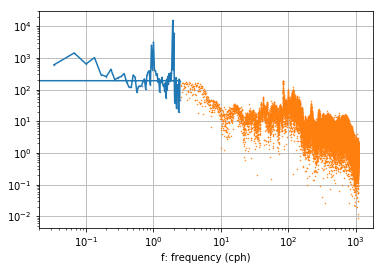




qtro


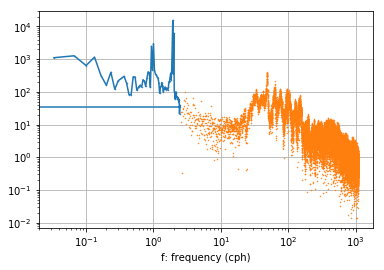




valp


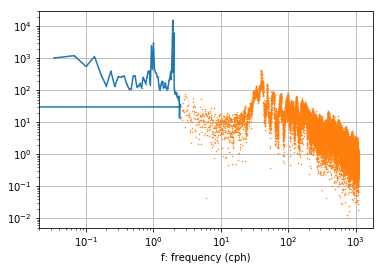




sano


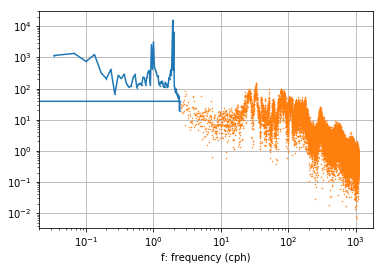




buca


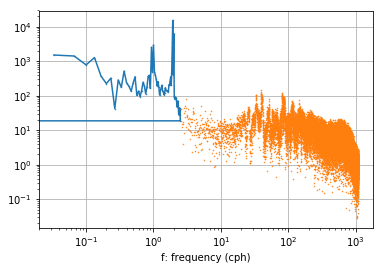




const


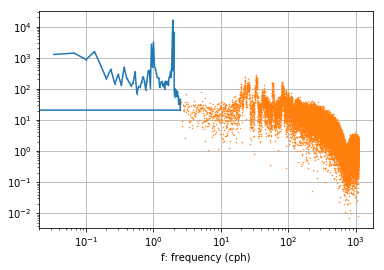

In [7]:
for station in stations:
    lowSignal,highSignal, t, h = filteredSignals[station]


    plt.plot(lowSignal['freq'][1:],np.abs(lowSignal['a'])[1:],'.-',ms=1)
    plt.plot(highSignal['freq'][1:],np.abs(highSignal['a'])[1:],'.',ms=1)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.xlabel('f: frequency (cph)')
    
    print(station)
    plt.show()
    print('\n\n')

In [8]:
earthquakeDate = pd.to_datetime('2015-09-16 22:54:33')
tearthquake = earthquakeDate.to_julian_date()

aric


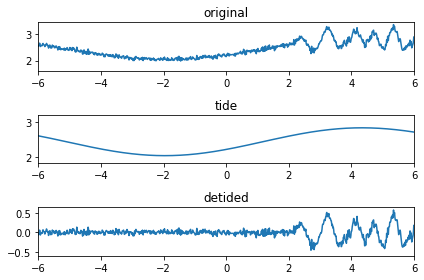




pisa


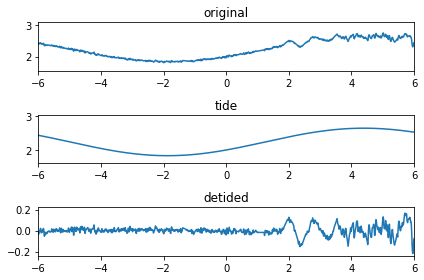




iqui


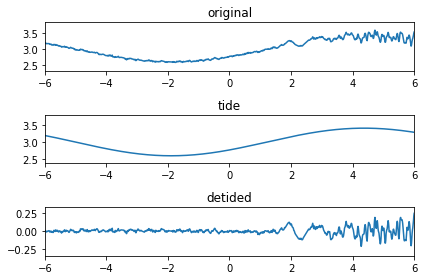




pata


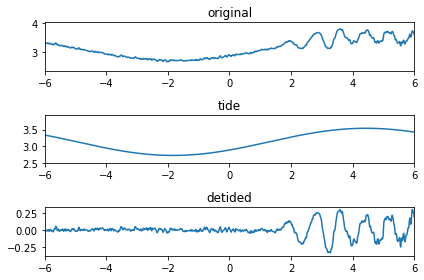




toco2


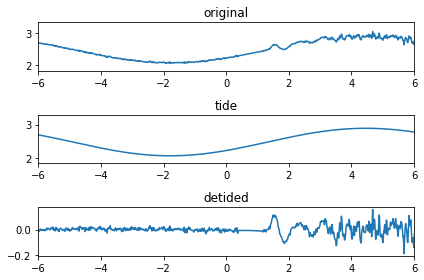




meji


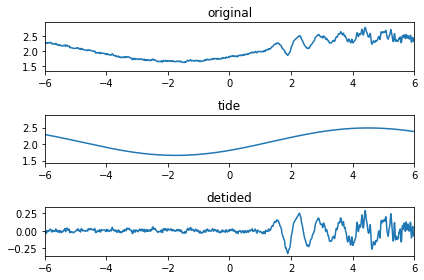




anto


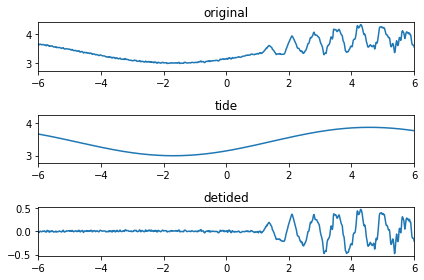




papo


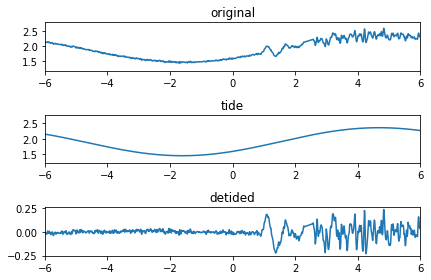




talt2


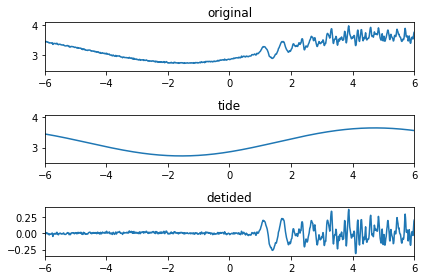




chnr


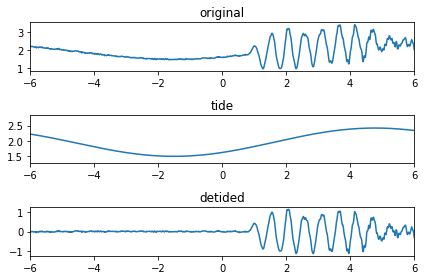




cald


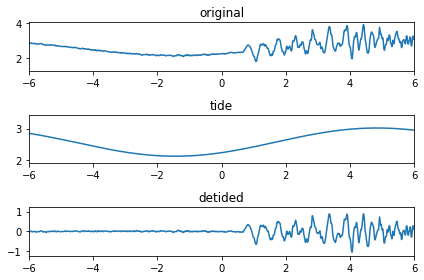




huas2


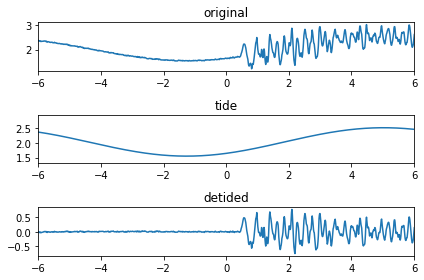




coqu


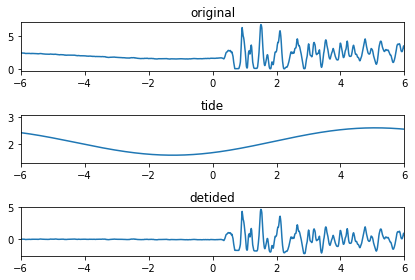




pich2


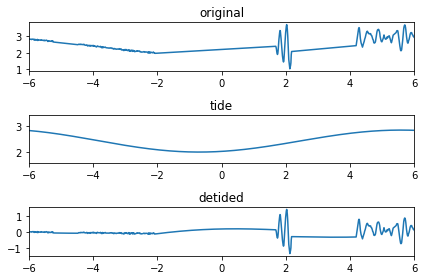




qtro


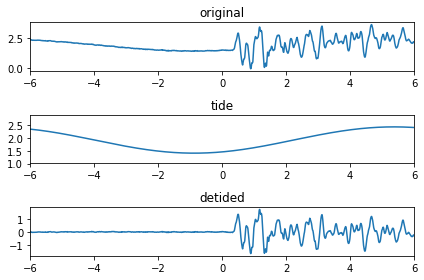




valp


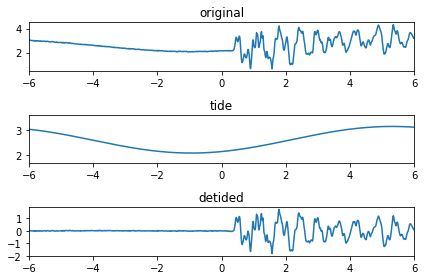




sano


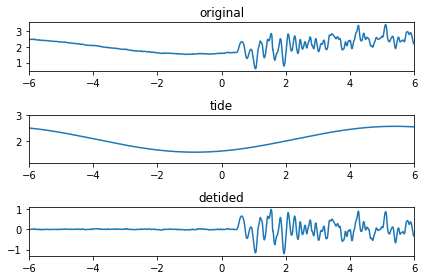




buca


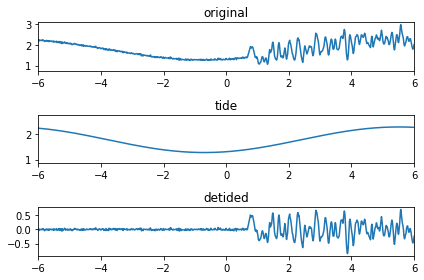




const


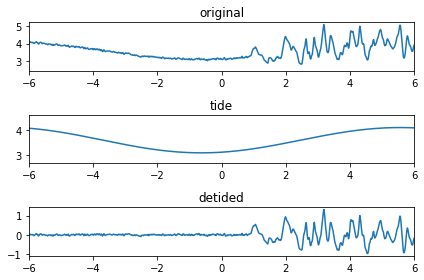

In [9]:
for station in stations:
    lowSignal,highSignal, t, h = filteredSignals[station]
    plt.subplot(311)
    plt.plot((t-tearthquake)*24, h)
    plt.title('original')
    plt.xlim(-6,6)
    plt.subplot(312)
    plt.plot((t-tearthquake)*24, lowSignal['h'].real)
    plt.title('tide')
    plt.xlim(-6,6)
    plt.subplot(313)
    plt.plot((t-tearthquake)*24, highSignal['h'].real)
    plt.title('detided')
    plt.xlim(-6,6)
    print(station)
    plt.tight_layout()
    plt.show()
    print('\n\n')
    
    

In [16]:
np.savetxt?

In [19]:
t-tearthquake

array([-15.95454861, -15.95409084, -15.95363307, ...,  14.04453585,
        14.04499362,  14.04545139])

In [17]:
for station in stations:
    print('saving ', station)
    lowSignal,highSignal, t, h = filteredSignals[station]

    detided = np.vstack([t-tearthquake,highSignal['h'].real]).T
    np.savetxt(station+'.txt', detided, delimiter=',', header='time,height')
    print('saved  ', station)


saving  aric
saved   aric
saving  pisa
saved   pisa
saving  iqui
saved   iqui
saving  pata
saved   pata
saving  toco2
saved   toco2
saving  meji
saved   meji
saving  anto
saved   anto
saving  papo
saved   papo
saving  talt2
saved   talt2
saving  chnr
saved   chnr
saving  cald
saved   cald
saving  huas2
saved   huas2
saving  coqu
saved   coqu
saving  pich2
saved   pich2
saving  qtro
saved   qtro
saving  valp
saved   valp
saving  sano
saved   sano
saving  buca
saved   buca
saving  const
saved   const


In [14]:
!head anto.txt

-1.595454861130565405e+01 4.971358520075112863e-02
-1.595409084064885974e+01 3.897120500865046411e-02
-1.595363306999206543e+01 4.160240448784534306e-02
-1.595317529933527112e+01 5.854938329058338026e-02
-1.595271752867847681e+01 6.658359693597484807e-02
-1.595225975802168250e+01 7.430575680632485469e-02
-1.595180198736488819e+01 8.203000430468412874e-02
-1.595134421670809388e+01 8.975645173476429206e-02
-1.595088644605129957e+01 8.134764047209853965e-02
-1.595042867539450526e+01 5.018664561409091895e-02


Observations: 

The error at 'pich2' station comes from lack of data in that given interval.